# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [17]:
digits = datasets.load_digits(n_class=3)
X = digits.data
X_ = X.copy()
y = digits.target
y_ = y.copy()

載入 相關套件 並 執行 PCA 實驗 ...

In [18]:
# 設定 模型 估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

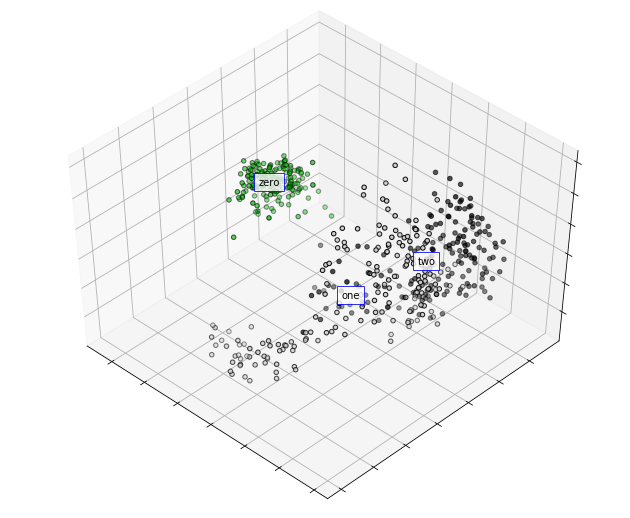

In [26]:
X = X_.copy()
y = y_.copy()
# 資料建模 並 視覺化 結果
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(9, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('zero', 0), 
                    ('one', 1), 
                    ('two', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.8, edgecolor='b', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()